In [7]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
url="https://www.ncei.noaa.gov/data/oceans/woa/DATA_ANALYSIS/3M_HEAT_CONTENT/DATA/basin/pentad/pent_h22-w0-2000m.dat"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

In [18]:
response = requests.get(url, headers=headers)
response.raise_for_status()  # Ensure we notice bad responses

In [19]:
response.text

'    YEAR      WO    WOse      NH    NHse      SH    SHse\n  1957.5  -9.303   2.025  -3.149   0.925  -6.153   1.100\n  1958.5  -8.059   2.017  -2.321   0.851  -5.738   1.166\n  1959.5  -8.713   2.036  -2.505   0.824  -6.208   1.212\n  1960.5  -5.479   1.893  -1.587   0.746  -3.892   1.148\n  1961.5  -4.762   1.773  -1.936   0.711  -2.826   1.061\n  1962.5  -4.121   1.728  -2.022   0.645  -2.100   1.082\n  1963.5  -5.697   1.815  -2.209   0.678  -3.487   1.137\n  1964.5  -6.521   1.733  -2.395   0.581  -4.125   1.152\n  1965.5  -7.218   1.741  -2.763   0.561  -4.455   1.179\n  1966.5  -9.122   1.664  -2.807   0.543  -6.315   1.121\n  1967.5  -9.059   1.619  -3.514   0.503  -5.545   1.116\n  1968.5  -8.991   1.468  -3.708   0.399  -5.283   1.069\n  1969.5  -7.620   1.375  -3.718   0.340  -3.902   1.034\n  1970.5  -6.838   1.312  -3.707   0.306  -3.131   1.005\n  1971.5  -5.627   1.316  -3.251   0.328  -2.376   0.987\n  1972.5  -4.770   1.374  -2.942   0.344  -1.828   1.030\n  1973.5  -4.

In [21]:
lines = response.text.splitlines()


# Step 2: Split the remaining lines by whitespace
data = [line.split() for line in lines]


columns = ["YEAR","WO","WOse","NH","NHse","SH","SHse"]
df = pd.DataFrame(data, columns=columns)

# Convert numeric columns to appropriate data types
df = df.apply(pd.to_numeric, errors="coerce")

# Drop rows where all elements are NaN (which might happen if the line was empty)
df.dropna(how="all", inplace=True)

# Display the DataFrame
print(df)

      YEAR      WO   WOse      NH   NHse      SH   SHse
1   1957.5  -9.303  2.025  -3.149  0.925  -6.153  1.100
2   1958.5  -8.059  2.017  -2.321  0.851  -5.738  1.166
3   1959.5  -8.713  2.036  -2.505  0.824  -6.208  1.212
4   1960.5  -5.479  1.893  -1.587  0.746  -3.892  1.148
5   1961.5  -4.762  1.773  -1.936  0.711  -2.826  1.061
..     ...     ...    ...     ...    ...     ...    ...
61  2017.5  22.147  0.190   9.599  0.088  12.548  0.102
62  2018.5  23.294  0.211  10.883  0.085  12.411  0.125
63  2019.5  24.442  0.179  11.444  0.085  12.999  0.094
64  2020.5  25.186  0.183  11.596  0.087  13.591  0.095
65  2021.5  26.648  0.190  12.273  0.091  14.376  0.099

[65 rows x 7 columns]


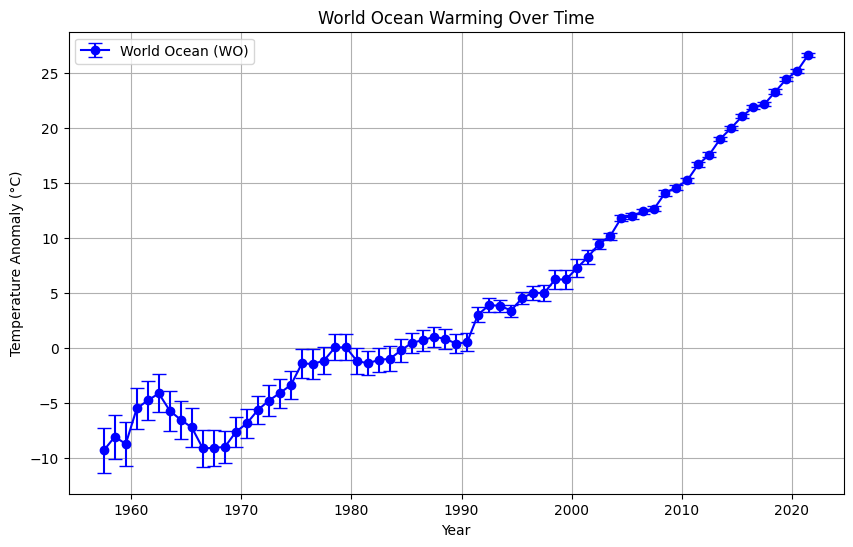

In [22]:
# Plotting World Ocean Warming
plt.figure(figsize=(10, 6))
plt.errorbar(df['YEAR'], df['WO'], yerr=df['WOse'], label='World Ocean (WO)', fmt='-o', capsize=5, color='blue')
plt.title('World Ocean Warming Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.legend()
plt.show()